In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import functions as f

In [4]:
df = pd.read_csv("star_classification.csv")

In [6]:
## Encoding class feature
from sklearn.preprocessing import LabelEncoder

lE = LabelEncoder()

lE.fit(df['class'])

df['target'] = lE.transform(df['class'])

## Number to Category match 
print("Mapping:", dict(zip(lE.classes_, lE.transform(lE.classes_))))

## Drop categorical Class
df = df.drop(columns='class')

Mapping: {'GALAXY': 0, 'QSO': 1, 'STAR': 2}


In [7]:
## dropping ID features and features that aid in "mapping" out the sky.
drop_cols = ['obj_ID','run_ID','field_ID','spec_obj_ID','fiber_ID',
             'rerun_ID','cam_col','MJD','plate', 'alpha','delta']

df= df.drop(columns=drop_cols, errors='ignore')

In [19]:
## Locating and dropping outliers leading to bizare graphs. 

features = ['u', 'g', 'z']

rows_dict = {feature: df[df[feature] == -9999] for feature in features}

print("Rows in column 'u' with -9999:")
print(rows_dict['u'])

Rows in column 'u' with -9999:
            u       g        r         i       z  redshift  target
79543 -9999.0 -9999.0  18.1656  18.01675 -9999.0  0.000089       2


In [21]:
df = df.drop([79543])

In [23]:
## Dataframe for each class
df_star = df[df['target'] == 2]
df_glxy = df[df['target'] == 0]
df_qso = df[df['target'] == 1]

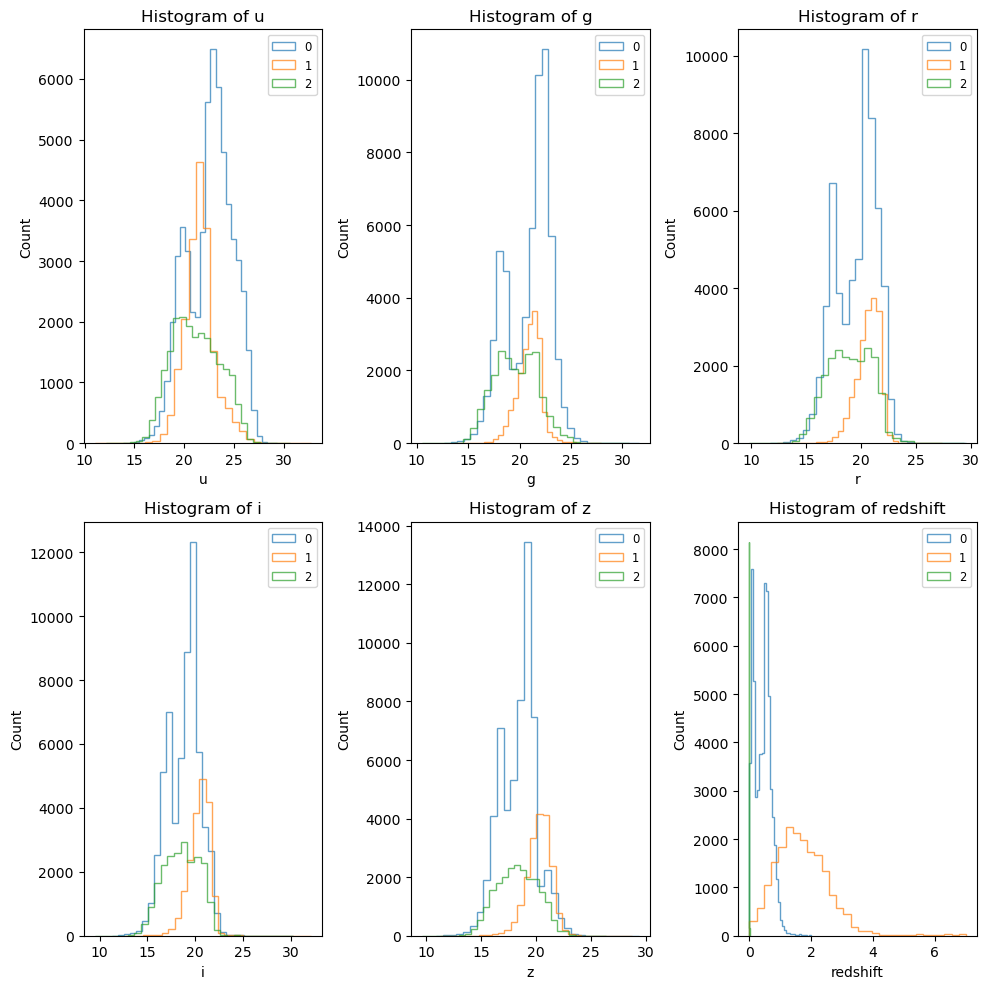

In [25]:
## Histogram 
fig, axs = f.plot_histograms_by_class(
    df,
    target_col='target'
)

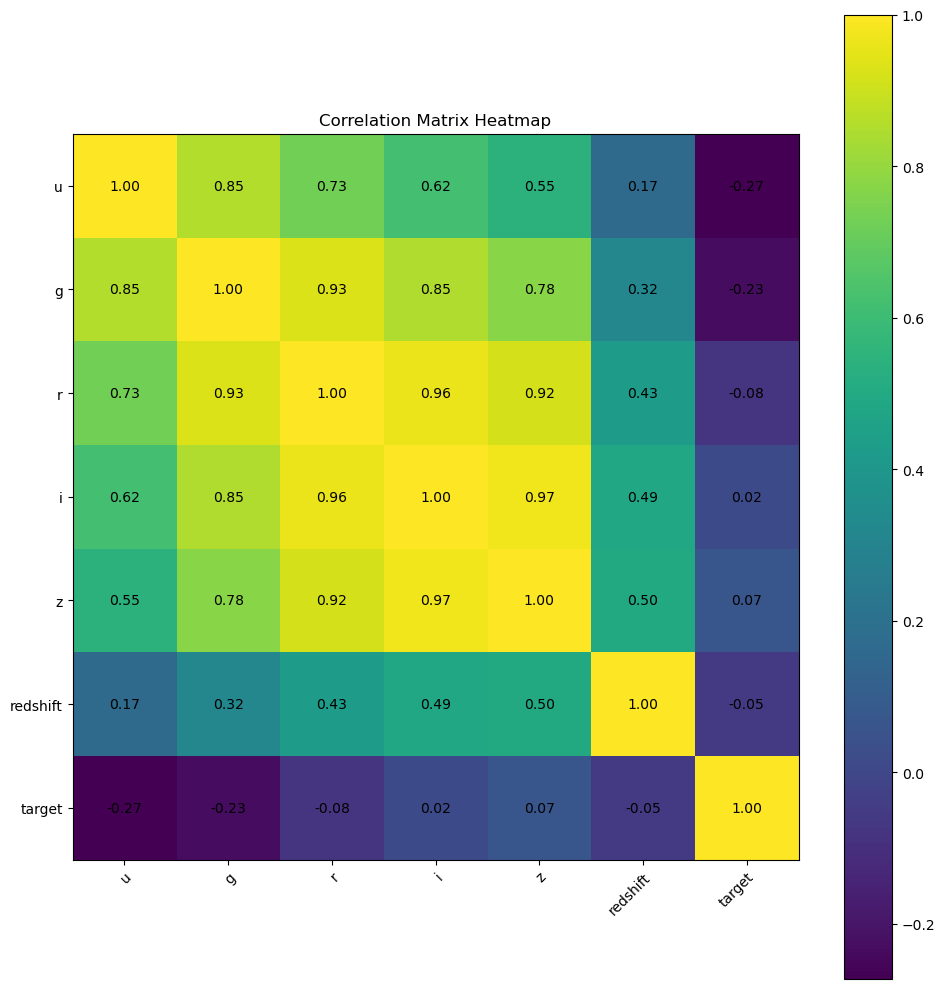

In [27]:
## Heatmap
fig, ax = f.plot_correlation_heatmap(df, figsize=(10,10))

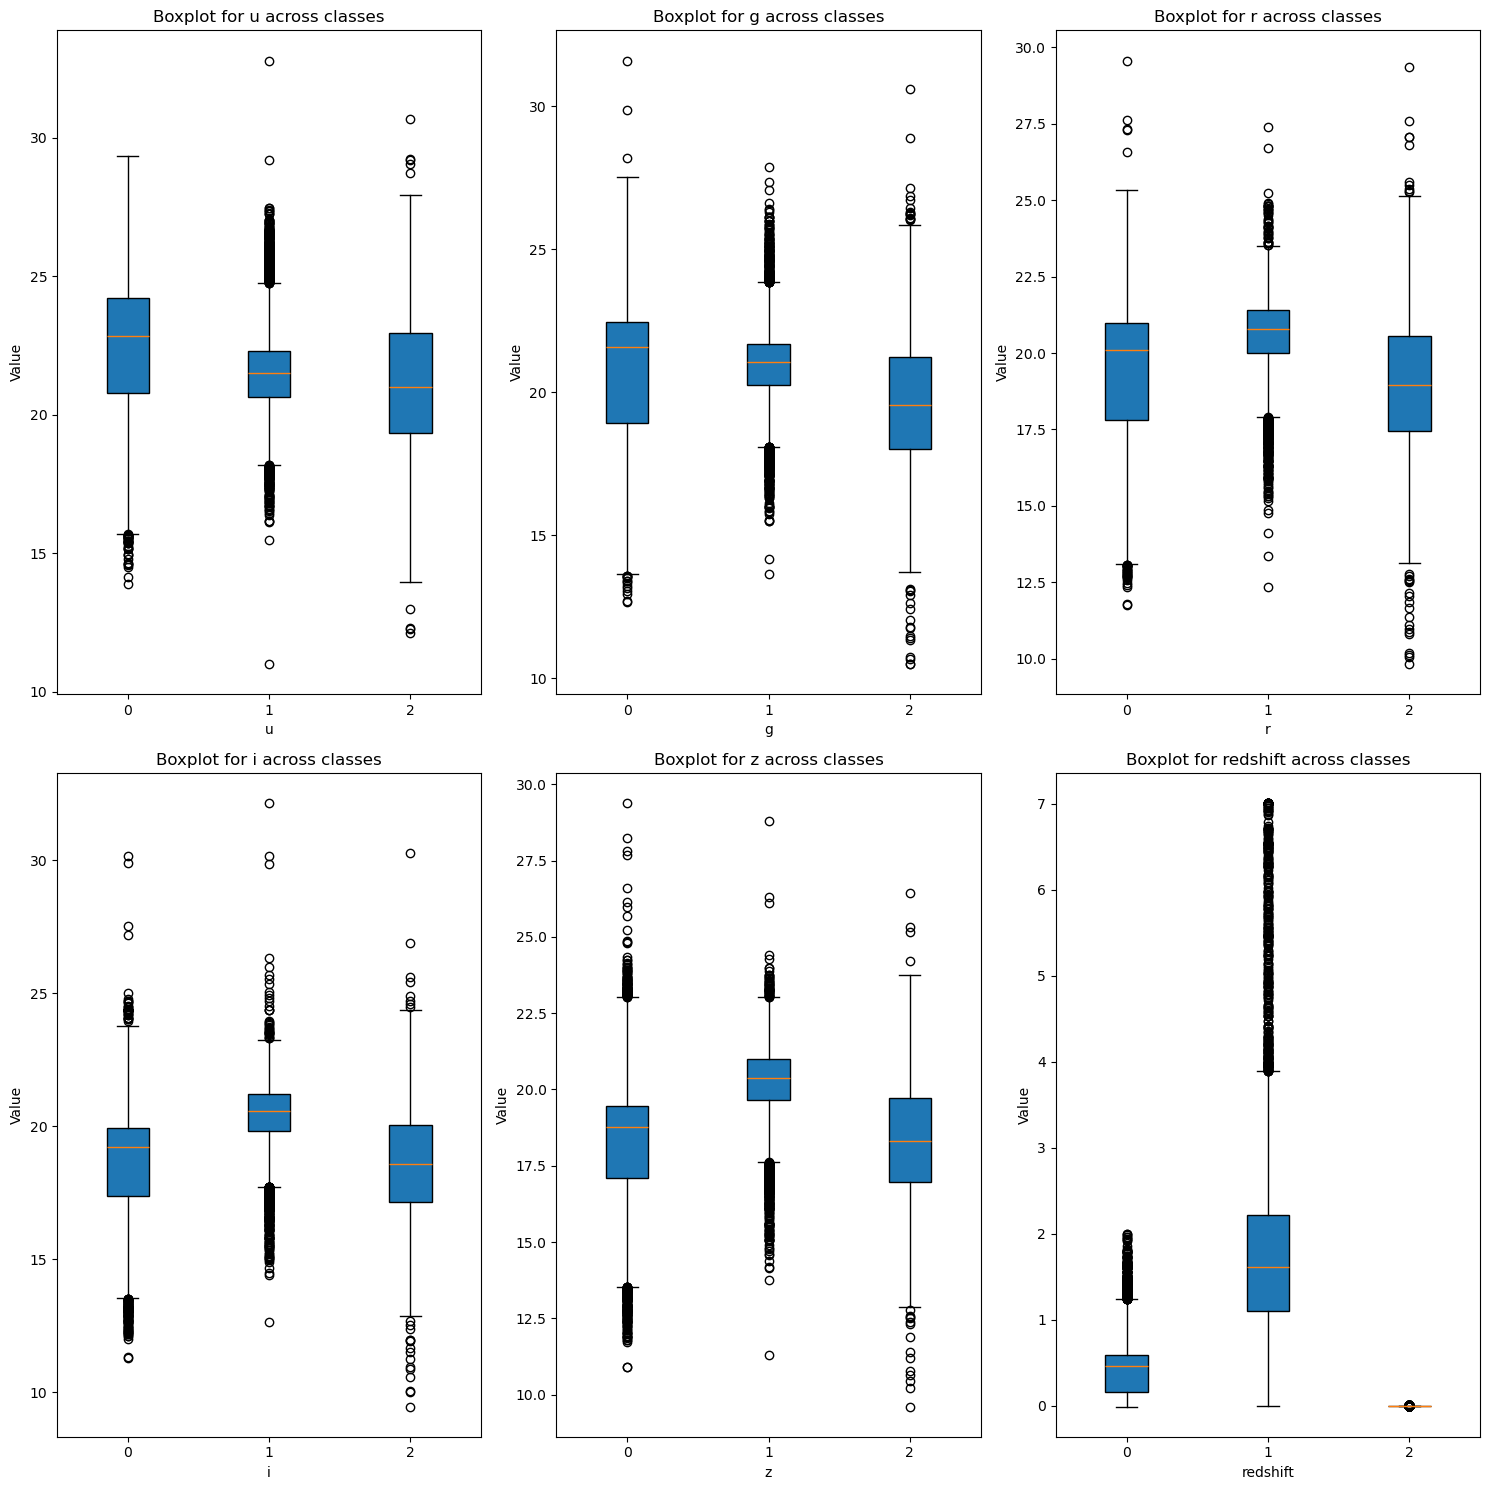

In [29]:
## Boxplot
fig, axs = f.plot_boxplots_by_class(df, target_col='target')

In [31]:
df.to_csv("main.csv", index=False)